In [47]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import LaggingFunction

**Example with very irregular times**

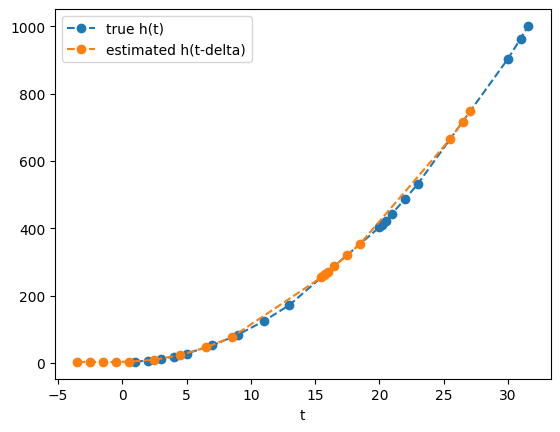

In [48]:
h_of_t = lambda t: t**2+3  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], 4.5)
h_delay_ests = []
ts = np.array([1,2,3,4,5, 7,9,11,13, 20,20.2,20.3,20.5, 21,22,23, 30,31, 31.6])

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--o', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--o', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()

**Example with exact delay matchup**

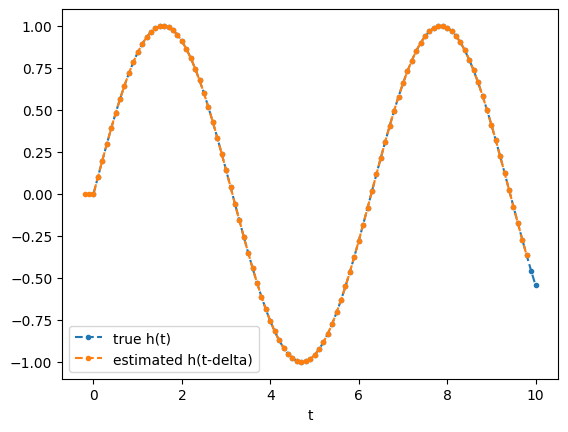

In [49]:
h_of_t = lambda t: np.sin(t)  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], 0.2)
h_delay_ests = []
ts = np.linspace(0, 10, 101)

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--.', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--.', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()

**Example with okay delays**

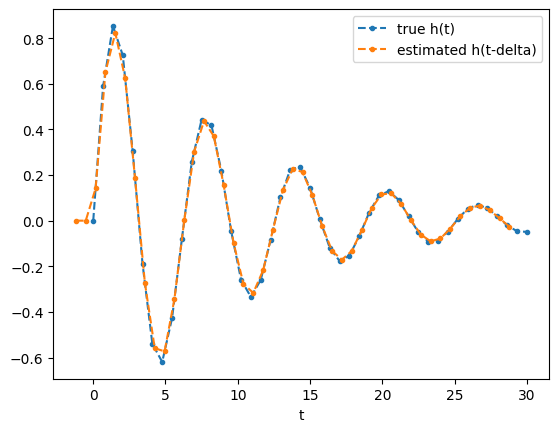

In [50]:
h_of_t = lambda t: np.sin(t)*np.exp(-0.1*t)  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], 1.2)
h_delay_ests = []
ts = np.linspace(0, 30, 45)

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--.', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--.', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()